In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import math 
import random
from math import log as log
df = pd.read_csv("D:\All downloads\leukemia (1).tab",delimiter = '\t')
df

,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,discrete,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous
1,class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALL,88,15091,311,21,-13,215,797,14538,9738,...,384,1582,185,511,389,793,329,36,191,-37
3,ALL,283,11038,134,-21,-219,116,433,615,115,...,231,624,169,837,442,782,295,11,76,-14
4,ALL,309,16692,378,67,104,476,1474,5669,3272,...,720,753,315,1199,168,1138,777,41,228,-41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,AML,95,39323,73,39,-60,60,306,569,478,...,60,669,63,297,358,423,41,0,1777,-49
71,AML,146,15689,302,25,-209,183,657,3762,2164,...,288,745,130,639,548,809,445,-2,210,16
72,AML,431,41570,235,27,-626,-249,477,-159,-745,...,761,878,84,1141,197,466,349,0,284,-73
73,AML,9,39538,101,106,-240,113,1313,34,-62,...,366,625,81,574,618,551,194,20,379,-60


In [13]:
df =df.drop([0,1,74])
df.head()

,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,ALL,88,15091,311,21,-13,215,797,14538,9738,...,384,1582,185,511,389,793,329,36,191,-37
3,ALL,283,11038,134,-21,-219,116,433,615,115,...,231,624,169,837,442,782,295,11,76,-14
4,ALL,309,16692,378,67,104,476,1474,5669,3272,...,720,753,315,1199,168,1138,777,41,228,-41
5,ALL,12,15763,268,43,-148,155,415,4850,2293,...,307,743,240,835,174,627,170,-50,126,-91
6,ALL,168,18128,118,-8,-55,122,483,1284,2731,...,178,626,156,649,504,250,314,14,56,-25


In [14]:
target = df['gene']
target

2     ALL
3     ALL
4     ALL
5     ALL
6     ALL
     ... 
69    AML
70    AML
71    AML
72    AML
73    AML
Name: gene, Length: 72, dtype: object

In [15]:
df.dtypes

gene              object
AFFX-BioC-5_at    object
hum_alu_at        object
AFFX-DapX-M_at    object
AFFX-LysX-5_at    object
                   ...  
X83863_at         object
Z17240_at         object
L49218_f_at       object
M71243_f_at       object
Z78285_f_at       object
Length: 5148, dtype: object

In [16]:
# converting datatype of each column to interger type
for col in df.columns[1:]:
    df[col] = df[col].astype(int)
df.dtypes    

gene              object
AFFX-BioC-5_at     int32
hum_alu_at         int32
AFFX-DapX-M_at     int32
AFFX-LysX-5_at     int32
                   ...  
X83863_at          int32
Z17240_at          int32
L49218_f_at        int32
M71243_f_at        int32
Z78285_f_at        int32
Length: 5148, dtype: object

In [17]:
# dataframe to store means of each column in df
means = pd.DataFrame()

for col in df.columns[1:]:
    col_list = df[col].values
    means_list = []
    for i in range(len(col_list)-1):
        m = (col_list[i] + col_list[i+1])/2
        means_list.append(m)
    means[col] = means_list

In [18]:
means[col]

0    -25.5
1    -27.5
2    -66.0
3    -58.0
4    -39.0
      ... 
66   -18.0
67   -22.0
68   -16.5
69   -28.5
70   -66.5
Name: Z78285_f_at, Length: 71, dtype: float64

In [19]:
def gini(dff):
    counts = dff.gene.value_counts()
    if('ALL' in counts.index) and ('AML' in counts.index):
        ALL = counts['ALL']
        AML = counts['AML']
    elif('ALL' not in counts.index) and ('AML' in counts.index):
        ALL = 0
        AML = counts['AML']
    elif('ALL' in counts.index) and ('AML' not in counts.index):
        ALL = counts['ALL']
        AML = 0
    else:
        return 1
    
    gini_impurity = 1 - (ALL/(ALL+AML))**2 - (AML/(AML+ALL))**2
    return gini_impurity



In [20]:
# dataframe to store gini values for each column
gini_df = pd.DataFrame()



In [21]:
# iterate through each column in means dataframe
for m_col in means.columns:
    gini_list = []
    for mean_value in means[m_col]:    
        # making left and right node
        left_node = df[df[m_col]<= mean_value]
        right_node = df[df[m_col] > mean_value]
        # get gini value for left and right node
        left_gini = gini(left_node)
        right_gini = gini(right_node)
        
        total_length = len(left_node) + len(right_node)
        # weighted value of gini
        weighted_mean = left_gini*len(left_node)/total_length + right_gini*len(right_node)/total_length
        # appending value of gini to list
        gini_list.append(weighted_mean)
        
    # passing list to column in gini dataframe    
    gini_df[m_col] = gini_list    

In [22]:
minvalue = gini_df.min()
minvalue

AFFX-BioC-5_at                 0.343619
hum_alu_at                     0.429624
AFFX-DapX-M_at                 0.443451
AFFX-LysX-5_at                 0.436839
AFFX-HUMISGF3A/M97935_MA_at    0.411975
                                 ...   
X83863_at                      0.435088
Z17240_at                      0.439134
L49218_f_at                    0.403836
M71243_f_at                    0.389340
Z78285_f_at                    0.435363
Length: 5147, dtype: float64

In [23]:
num = pd.DataFrame(minvalue)
num

,0
AFFX-BioC-5_at,0.343619
hum_alu_at,0.429624
AFFX-DapX-M_at,0.443451
AFFX-LysX-5_at,0.436839
AFFX-HUMISGF3A/M97935_MA_at,0.411975
...,...
X83863_at,0.435088
Z17240_at,0.439134
L49218_f_at,0.403836
M71243_f_at,0.389340


<AxesSubplot:>

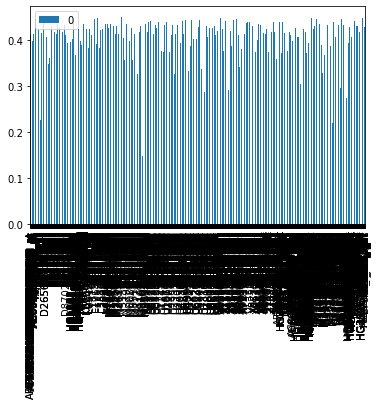

In [26]:
num.plot.bar()

In [15]:
num.sort_values(0)


,0
M27891_at,0.079861
M23197_at,0.101235
M31523_at,0.101235
M84526_at,0.102397
D88422_at,0.102397
...,...
U85658_at,0.449922
U91932_at,0.449922
M61906_at,0.449922
L13740_at,0.450202


In [16]:
x = num.sort_values(0)
top20 = x.index[:20]
top20

Index(['M27891_at', 'M23197_at', 'M31523_at', 'M84526_at', 'D88422_at',
       'X95735_at', 'U46499_at', 'M11722_at', 'L09209_s_at', 'M92287_at',
       'M83652_s_at', 'X62654_rna1_at', 'X62320_at', 'J05243_at', 'X61587_at',
       'X59417_at', 'M96326_rna1_at', 'X52056_at', 'X17042_at', 'M31211_s_at'],
      dtype='object')

In [17]:
A = df[top20]
A

,M27891_at,M23197_at,M31523_at,M84526_at,D88422_at,X95735_at,U46499_at,M11722_at,L09209_s_at,M92287_at,M83652_s_at,X62654_rna1_at,X62320_at,J05243_at,X61587_at,X59417_at,M96326_rna1_at,X52056_at,X17042_at,M31211_s_at
2,303,261,1320,-283,161,298,44,3282,1284,4778,-70,631,524,610,242,3016,782,-267,177,601
3,1358,101,898,-65,588,307,146,1627,540,2700,364,739,1074,927,667,3424,368,421,3460,435
4,254,309,597,-395,207,309,110,2783,236,4926,-208,106,485,1697,419,7724,1268,-1046,416,547
5,-304,288,1644,-367,82,693,86,1544,786,5403,34,352,370,425,-100,3821,882,5,392,472
6,-86,395,1322,290,337,713,104,1896,968,3440,218,2028,1242,529,918,5216,949,484,7972,661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,12735,560,375,4667,1347,2194,1550,-170,1717,456,1336,1762,2052,220,1474,614,4561,243,5086,198
70,2103,341,528,-189,106,543,163,249,1095,836,562,1397,547,230,549,2284,380,-171,3340,226
71,19680,1883,253,7924,7807,5949,2767,106,6008,1152,6155,1756,9980,5,3418,1453,2270,3654,5178,74
72,3293,2204,450,2705,658,4174,1415,-27,1819,227,1089,932,734,195,2133,986,2914,1979,6311,51


In [18]:
gini_df

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0.437521,0.447391,0.452996,0.451592,0.440798,0.452675,0.453086,0.433602,0.427350,0.427350,...,0.453086,0.340136,0.434732,0.448422,0.452576,0.444895,0.452400,0.416028,0.418923,0.446160
1,0.360615,0.447391,0.453241,0.449339,0.432778,0.451893,0.452599,0.431584,0.439921,0.425463,...,0.451316,0.259331,0.452629,0.452599,0.443279,0.445192,0.447483,0.423397,0.414192,0.443673
2,0.446449,0.436839,0.452206,0.444787,0.417409,0.451893,0.452599,0.425463,0.425463,0.414427,...,0.440972,0.261218,0.452599,0.452599,0.440278,0.447868,0.452419,0.421688,0.400162,0.452629
3,0.435294,0.438740,0.452381,0.452932,0.425081,0.453299,0.452083,0.431584,0.411891,0.423397,...,0.452083,0.280627,0.451551,0.451592,0.451929,0.449903,0.450206,0.451389,0.436839,0.453189
4,0.448251,0.448495,0.452932,0.453216,0.452471,0.453310,0.452083,0.431584,0.421121,0.433084,...,0.453259,0.290698,0.444895,0.451852,0.451929,0.447917,0.453310,0.430826,0.416152,0.452778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.404167,0.435363,0.450231,0.450206,0.450103,0.450743,0.452702,0.452576,0.449164,0.452400,...,0.452932,0.291088,0.452610,0.451592,0.441087,0.445192,0.451852,0.451389,0.420718,0.451737
67,0.448251,0.439980,0.449537,0.452576,0.443926,0.451852,0.452599,0.448048,0.453310,0.452313,...,0.439146,0.300521,0.453125,0.452877,0.448048,0.453081,0.453159,0.435088,0.424298,0.452400
68,0.448251,0.446120,0.453125,0.452576,0.443926,0.453299,0.445863,0.446047,0.443511,0.451551,...,0.447016,0.259331,0.445809,0.452160,0.452610,0.453317,0.450206,0.424726,0.424298,0.451737
69,0.373797,0.443182,0.453221,0.453317,0.452503,0.452902,0.452400,0.450202,0.440657,0.452313,...,0.440972,0.293576,0.447016,0.452877,0.453317,0.452400,0.452877,0.424726,0.389340,0.443673


In [19]:
df1 = df.copy()
df1 = df1.drop(['gene'], axis = 1)

In [20]:
A

,M27891_at,M23197_at,M31523_at,M84526_at,D88422_at,X95735_at,U46499_at,M11722_at,L09209_s_at,M92287_at,M83652_s_at,X62654_rna1_at,X62320_at,J05243_at,X61587_at,X59417_at,M96326_rna1_at,X52056_at,X17042_at,M31211_s_at
2,303,261,1320,-283,161,298,44,3282,1284,4778,-70,631,524,610,242,3016,782,-267,177,601
3,1358,101,898,-65,588,307,146,1627,540,2700,364,739,1074,927,667,3424,368,421,3460,435
4,254,309,597,-395,207,309,110,2783,236,4926,-208,106,485,1697,419,7724,1268,-1046,416,547
5,-304,288,1644,-367,82,693,86,1544,786,5403,34,352,370,425,-100,3821,882,5,392,472
6,-86,395,1322,290,337,713,104,1896,968,3440,218,2028,1242,529,918,5216,949,484,7972,661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,12735,560,375,4667,1347,2194,1550,-170,1717,456,1336,1762,2052,220,1474,614,4561,243,5086,198
70,2103,341,528,-189,106,543,163,249,1095,836,562,1397,547,230,549,2284,380,-171,3340,226
71,19680,1883,253,7924,7807,5949,2767,106,6008,1152,6155,1756,9980,5,3418,1453,2270,3654,5178,74
72,3293,2204,450,2705,658,4174,1415,-27,1819,227,1089,932,734,195,2133,986,2914,1979,6311,51


In [32]:
# A.info

In [21]:
target

2     ALL
3     ALL
4     ALL
5     ALL
6     ALL
     ... 
69    AML
70    AML
71    AML
72    AML
73    AML
Name: gene, Length: 72, dtype: object

In [22]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [23]:
y = target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [24]:
A_train, A_test, y_train, y_test = train_test_split(A , y, test_size = 0.3, random_state = 400)
print("Training split input- ", A_train.shape)
print("Testing split input- ", A_test.shape)

Training split input-  (50, 20)
Testing split input-  (22, 20)


In [25]:
dtree=DecisionTreeClassifier()
dtree.fit(A_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [26]:
y_pred = dtree.predict(A_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.89      1.00      0.94         8

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.95        22
weighted avg       0.96      0.95      0.96        22



Text(0.5, 1.0, 'Accuracy Score: 0.9545454545454546')

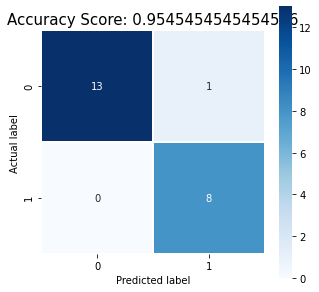

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(A_test, y_test))
plt.title(all_sample_title, size = 15)

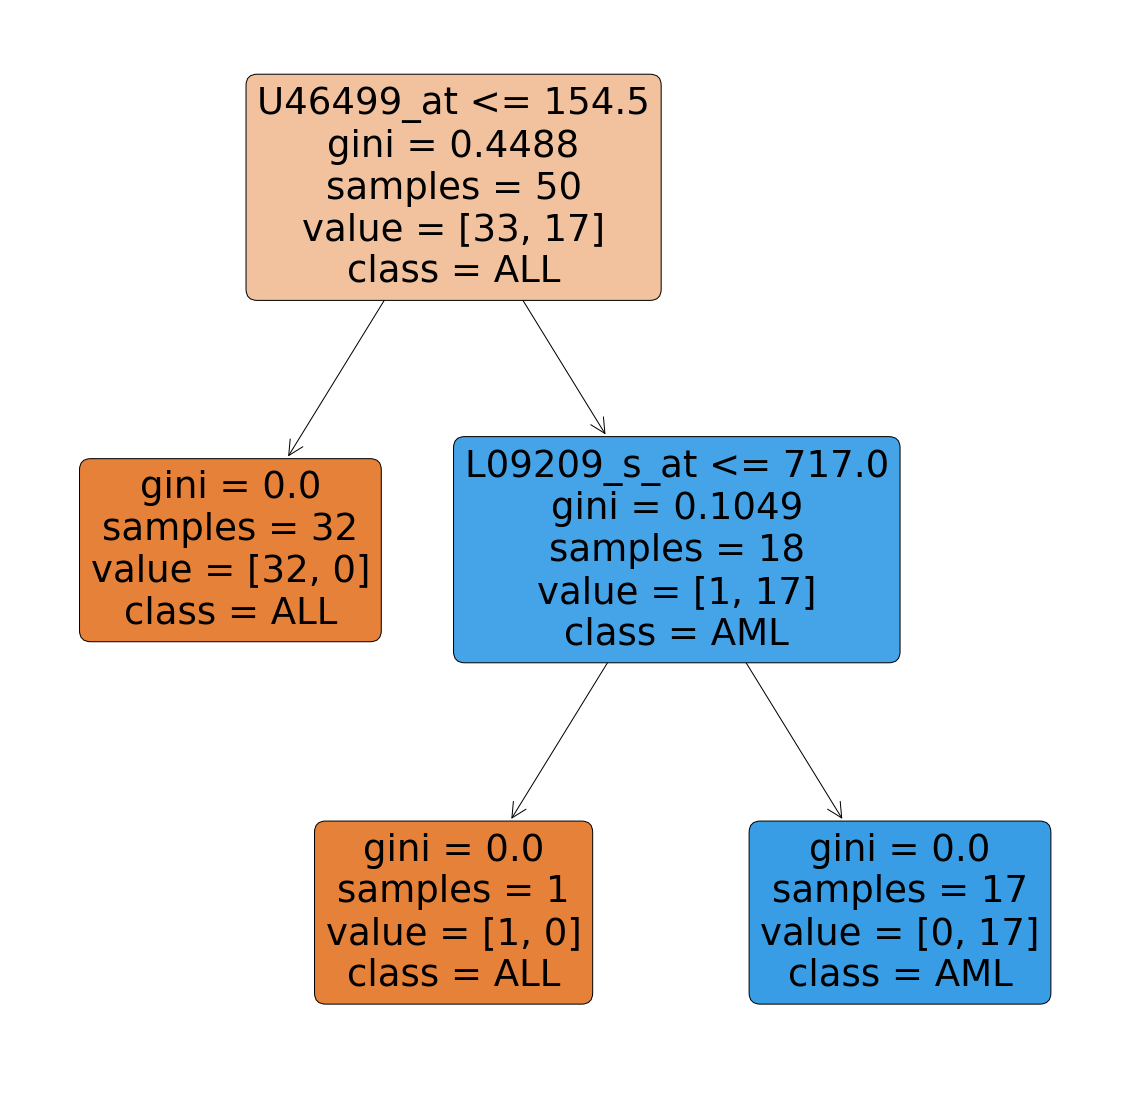

In [28]:
# Visualising the graph without the use of graphviz
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = A.columns, 
                     class_names =["ALL", "AML"] , filled = True , precision = 4, rounded = True)


In [29]:
def entropy(dff):
    counts = dff.gene.value_counts()
    if('ALL' in counts.index) and ('AML' in counts.index):
        ALL = counts['ALL']
        AML = counts['AML']
    elif('ALL' not in counts.index) and ('AML' in counts.index):
        ALL = 0
        AML = counts['AML']
    elif('ALL' in counts.index) and ('AML' not in counts.index):
        ALL = counts['ALL']
        AML = 0
    else:
        return 1
    try:
        p=ALL/(ALL+AML)
        q=AML/(ALL+AML)
        entropy = -((p* log(p,2)) + (q* log(q,2)))
        return entropy
    except(ValueError):
        return 0
  


In [30]:
whole_entropy=entropy(df)
whole_entropy

0.931562768480964

In [31]:
rows=len(df)
rows

72

In [32]:
entropy_df=pd.DataFrame()

In [33]:
for m_col in means.columns:
    ent_list = []
    for mean_value in means[m_col]:  
        left_node = df[df[m_col]<= mean_value]
        right_node = df[df[m_col] > mean_value]
        left_ent = entropy(left_node)
        right_ent = entropy(right_node)
        
        lprob,rprob=len(left_node)/rows,len(right_node)/rows
        
        info_gain = whole_entropy-((lprob*left_ent)+(rprob*right_ent))
        ent_list.append(info_gain)
        
    entropy_df[m_col] = ent_list

In [35]:
entropy_df

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0.025232,0.010539,0.000510,0.002778,0.020014,0.001019,0.000369,0.037260,0.063780,0.063780,...,0.000369,0.251212,0.030105,0.007861,0.001190,0.013291,0.001466,0.063878,0.060314,0.011450
1,0.143268,0.010539,0.000123,0.006303,0.031944,0.002207,0.001167,0.037718,0.022557,0.053468,...,0.003290,0.345702,0.001112,0.001167,0.015974,0.012659,0.008897,0.052320,0.068766,0.015426
2,0.011092,0.029220,0.001861,0.014446,0.055029,0.002207,0.001167,0.053468,0.053468,0.093868,...,0.022781,0.359950,0.001167,0.001167,0.022924,0.008527,0.001405,0.048866,0.091268,0.001112
3,0.031128,0.025034,0.001479,0.000614,0.044938,0.000031,0.001961,0.037718,0.080576,0.052320,...,0.001961,0.298754,0.002836,0.002778,0.002201,0.005613,0.005008,0.003005,0.029220,0.000206
4,0.008310,0.007581,0.000614,0.000162,0.001354,0.000012,0.001961,0.037718,0.062145,0.034339,...,0.000093,0.345808,0.013291,0.002297,0.002201,0.008941,0.000012,0.037165,0.067666,0.000858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.075931,0.027816,0.004985,0.005008,0.005244,0.004029,0.000969,0.001190,0.006408,0.001466,...,0.000614,0.261594,0.001138,0.002778,0.020103,0.012659,0.002297,0.003005,0.055756,0.002499
67,0.008310,0.020531,0.006285,0.001190,0.015100,0.002297,0.001167,0.008398,0.000012,0.001601,...,0.021544,0.258404,0.000304,0.000696,0.008398,0.000376,0.000254,0.027915,0.043732,0.001466
68,0.008310,0.011276,0.000308,0.001190,0.015100,0.000031,0.011872,0.011981,0.016228,0.002836,...,0.009804,0.345702,0.011601,0.001821,0.001138,0.000002,0.005008,0.044530,0.043732,0.002499
69,0.122543,0.015824,0.000154,0.000002,0.001334,0.000649,0.001466,0.005054,0.021028,0.001601,...,0.022781,0.302980,0.009804,0.000696,0.000002,0.001466,0.000696,0.044530,0.101741,0.015426


In [36]:
maximum=entropy_df.max()
maximum

AFFX-BioC-5_at                 0.171958
hum_alu_at                     0.045166
AFFX-DapX-M_at                 0.017396
AFFX-LysX-5_at                 0.029220
AFFX-HUMISGF3A/M97935_MA_at    0.064978
                                 ...   
X83863_at                      0.027915
Z17240_at                      0.035428
L49218_f_at                    0.078969
M71243_f_at                    0.101741
Z78285_f_at                    0.027816
Length: 5147, dtype: float64

In [37]:
num1 = pd.DataFrame(maximum)
num1

,0
AFFX-BioC-5_at,0.171958
hum_alu_at,0.045166
AFFX-DapX-M_at,0.017396
AFFX-LysX-5_at,0.029220
AFFX-HUMISGF3A/M97935_MA_at,0.064978
...,...
X83863_at,0.027915
Z17240_at,0.035428
L49218_f_at,0.078969
M71243_f_at,0.101741


In [ ]:
num1.plot.bar()

In [38]:
x = num1.sort_values(0)
top20 = x.index[:20]
top20

Index(['M19301_at', 'L13740_at', 'L15309_at', 'X71428_at', 'U26403_at',
       'L49380_at', 'M83751_at', 'X03100_cds2_at', 'X98176_at', 'U73477_s_at',
       'J00209_f_at', 'M30773_at', 'M13699_at', 'D38550_at', 'M74093_at',
       'Y00083_s_at', 'U50648_s_at', 'X98085_at', 'M61906_at', 'U85658_at'],
      dtype='object')

In [39]:
A1 = df[top20]
A1

,M19301_at,L13740_at,L15309_at,X71428_at,U26403_at,L49380_at,M83751_at,X03100_cds2_at,X98176_at,U73477_s_at,J00209_f_at,M30773_at,M13699_at,D38550_at,M74093_at,Y00083_s_at,U50648_s_at,X98085_at,M61906_at,U85658_at
2,152,448,208,4631,68,2763,554,9110,-63,338,-48,-23,-136,287,-114,14,1532,1545,209,346
3,106,831,86,4481,94,2199,1006,1538,79,1092,-32,-4,44,555,15,-36,1659,1360,160,351
4,86,419,279,5366,84,3309,912,672,-34,1111,27,74,30,498,-106,30,1886,1295,205,498
5,56,314,191,3243,42,2551,290,2989,3,366,-7,-6,-34,439,-68,-15,1468,769,185,175
6,95,409,32,3397,172,2330,893,3667,86,528,-28,41,37,540,110,-1,660,1212,178,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,46,1011,111,2594,70,1784,1065,3665,107,271,44,43,-42,323,-222,0,757,879,170,214
70,99,602,30,2988,-2,1610,1036,756,113,202,36,2,-17,267,132,-30,1014,962,199,115
71,4,1014,207,4315,73,1298,591,11016,174,989,-54,73,32,541,-99,11,1625,2635,118,291
72,97,691,303,6097,-16,3982,791,3700,401,444,-94,119,-8,1341,2,37,2241,1238,555,466


In [40]:
A1.info

<bound method DataFrame.info of     M19301_at  L13740_at  L15309_at  X71428_at  U26403_at  L49380_at  \
2         152        448        208       4631         68       2763   
3         106        831         86       4481         94       2199   
4          86        419        279       5366         84       3309   
5          56        314        191       3243         42       2551   
6          95        409         32       3397        172       2330   
..        ...        ...        ...        ...        ...        ...   
69         46       1011        111       2594         70       1784   
70         99        602         30       2988         -2       1610   
71          4       1014        207       4315         73       1298   
72         97        691        303       6097        -16       3982   
73        -81        574        233       3067         97       1661   

    M83751_at  X03100_cds2_at  X98176_at  U73477_s_at  J00209_f_at  M30773_at  \
2         554         

In [41]:
A1_train, A1_test, y_train, y_test = train_test_split(A1 , y, test_size = 0.3, random_state = 400)
print("Training split input- ", A1_train.shape)
print("Testing split input- ", A1_test.shape)

Training split input-  (50, 20)
Testing split input-  (22, 20)


In [42]:
dtree=DecisionTreeClassifier()
dtree.fit(A1_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [43]:
y_pred = dtree.predict(A1_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.43      0.38      0.40         8

    accuracy                           0.59        22
   macro avg       0.55      0.54      0.54        22
weighted avg       0.58      0.59      0.58        22



Text(0.5, 1.0, 'Accuracy Score: 0.5909090909090909')

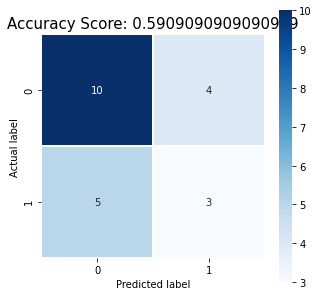

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(A1_test, y_test))
plt.title(all_sample_title, size = 15)

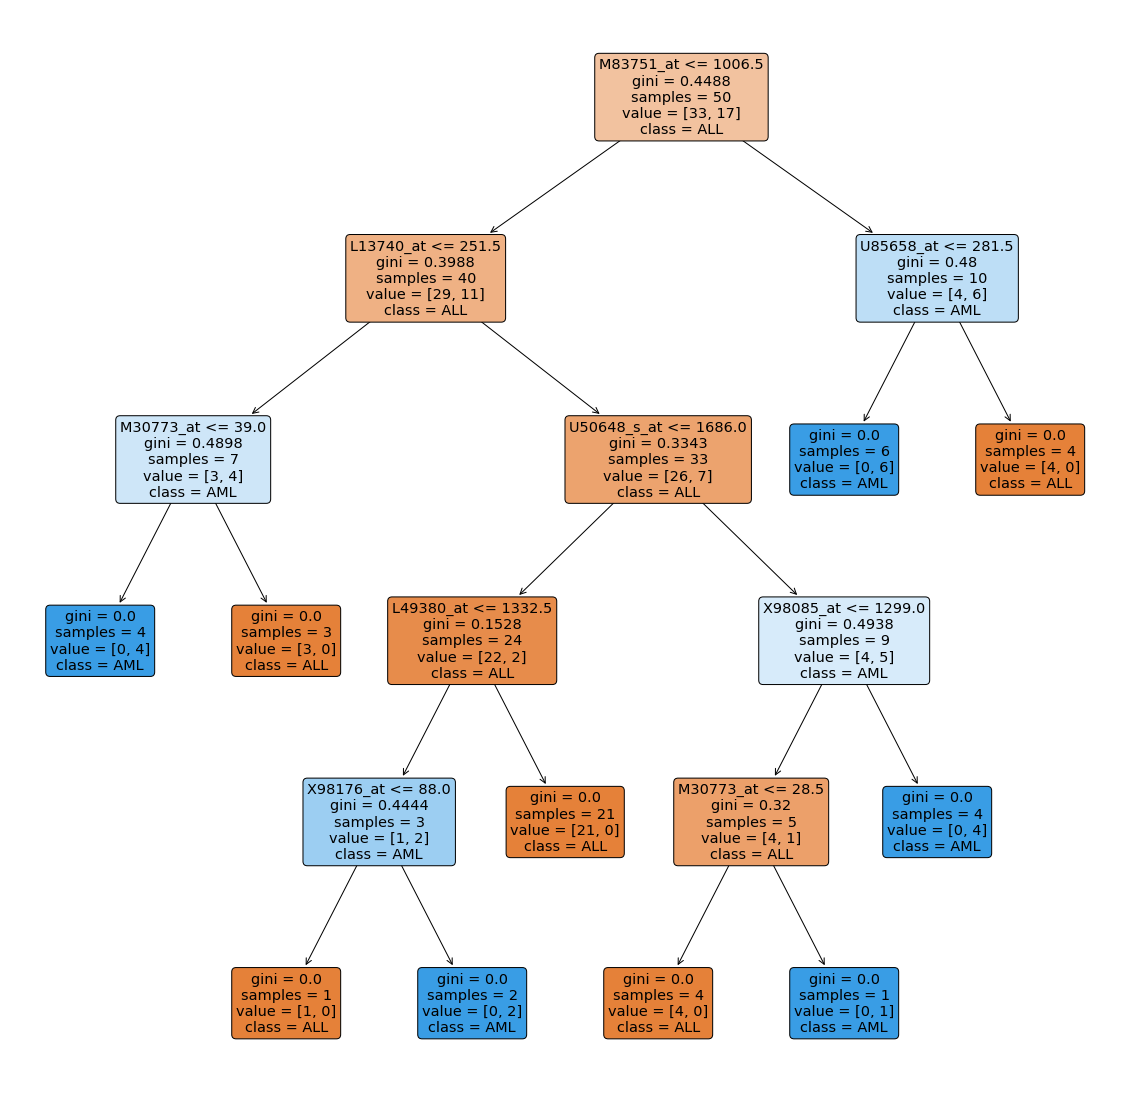

In [45]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = A1.columns, 
                     class_names =["ALL", "AML"] , filled = True , precision = 4, rounded = True)